# Test PDPbox with binary classification problem
## Kaggle Titanic with XGBoost
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

import sys
sys.path.insert(0, '../../')

In [2]:
from pdpbox import pdp, get_dataset

## get dataset

In [3]:
test_titanic = get_dataset.titanic()

In [4]:
test_titanic.keys()

['xgb_model', 'data', 'features', 'target']

In [5]:
titanic_data = test_titanic['data']
titanic_features = test_titanic['features']
titanic_model = test_titanic['xgb_model']
titanic_target = test_titanic['target']

## Binary feature: Sex

In [6]:
pdp_sex = pdp.pdp_isolate(model=titanic_model, 
                          train_X=titanic_data[titanic_features], 
                          feature='Sex')

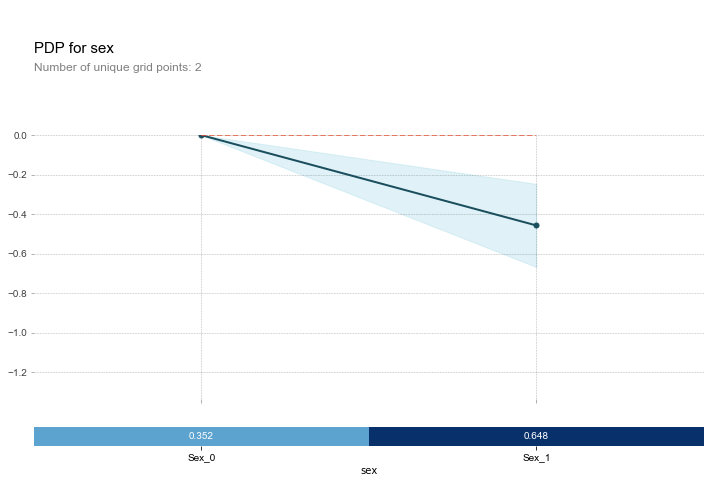

In [7]:
# default
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', figsize=(12, 8))

In [9]:
pdp_sex = pdp.pdp_isolate(model=titanic_model, 
                          train_X=titanic_data[titanic_features], 
                          feature='Sex')

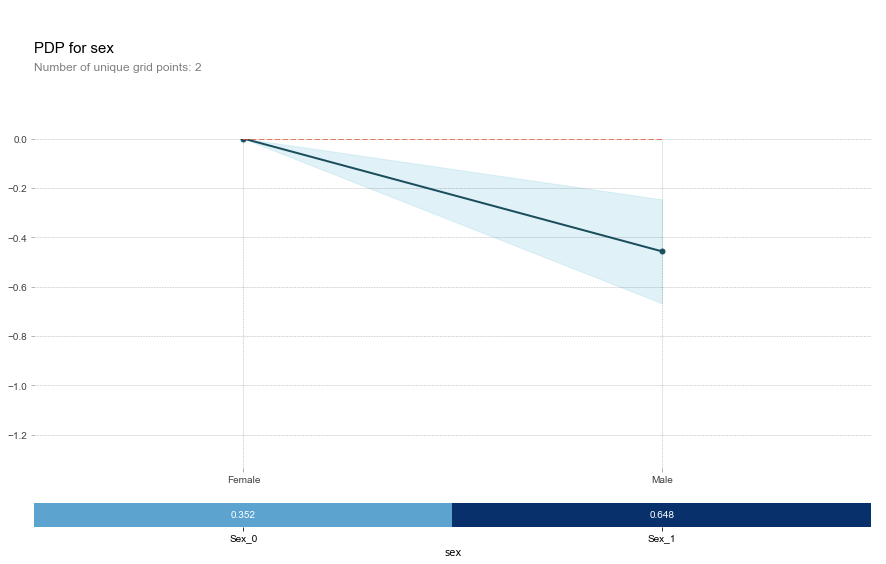

In [8]:
# default
fig, axes = pdp.pdp_plot(pdp_sex, 'sex')
_ = axes['pdp_ax'].set_xticklabels(['Female', 'Male'])

In [ ]:
axes

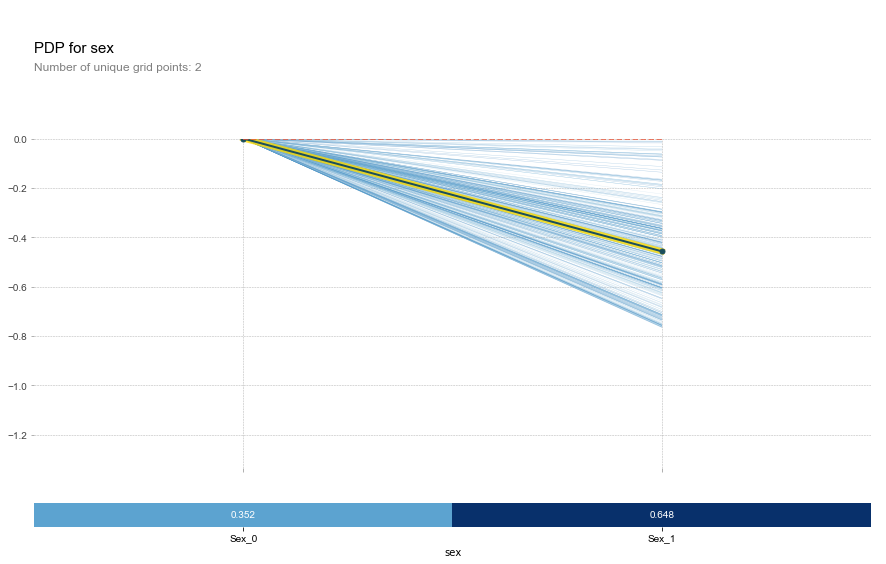

In [8]:
# also plot out the individual conditional expectation lines
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', plot_lines=True, frac_to_plot=0.5)

In [ ]:
# try to do clustering on all the individual conditional expectation lines
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', center=True, frac_to_plot=0.5, cluster=True, 
                         n_cluster_centers=10, cluster_method='accurate')

In [ ]:
fig, axes = pdp.pdp_plot(pdp_sex, 'sex', center=True, frac_to_plot=0.5, cluster=True, 
                         n_cluster_centers=10, cluster_method='approx')

## one-hot encoding feature: embarked
for one-hot encoding feature, should provide a list containing all the related columns

In [9]:
pdp_embark = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], ['Embarked_C', 'Embarked_S', 'Embarked_Q'])

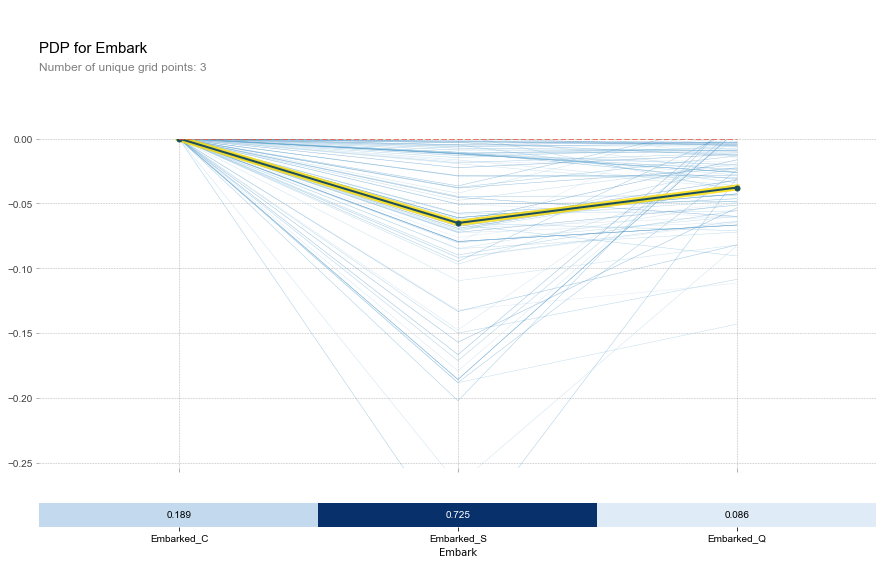

In [10]:
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=True, plot_lines=True, frac_to_plot=100)

In [ ]:
# try to set center=False, it's harder to tell the difference when the lines are not centered
fig, axes = pdp.pdp_plot(pdp_embark, 'Embark', center=False, plot_lines=True, frac_to_plot=100)

## numeric feature: fare

In [6]:
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare')

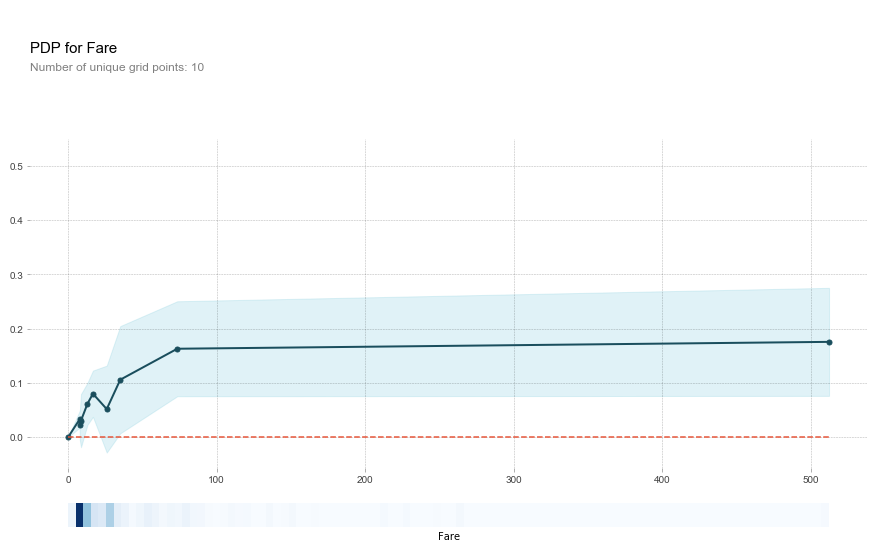

In [7]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare')

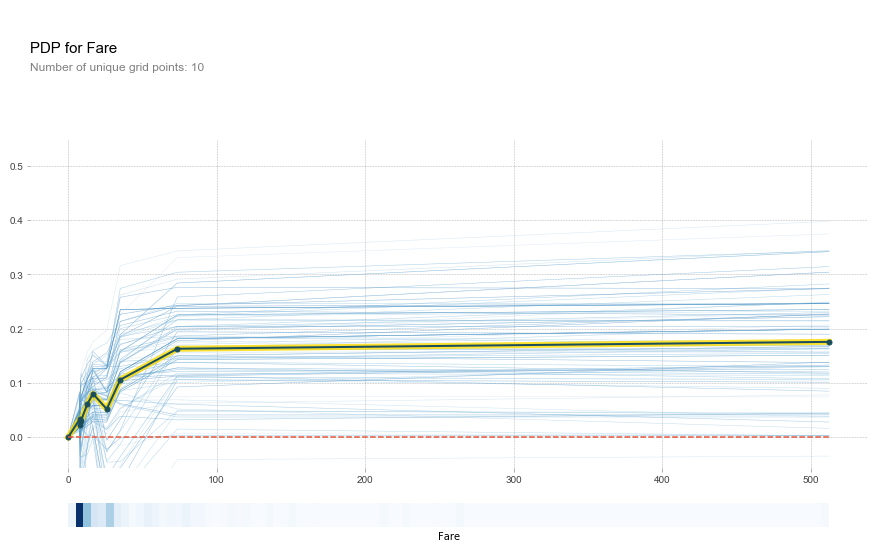

In [10]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=100)

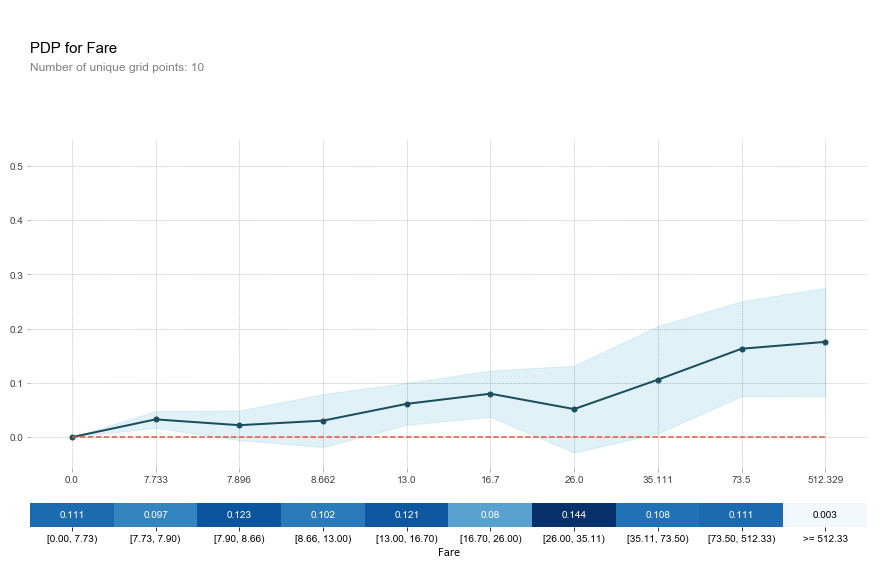

In [8]:
# for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True)

In [ ]:
# for numeric feature, you can set x_quantile=True to make x ticks the same as the feature grid points
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', x_quantile=True, show_percentile=True)

In [ ]:
df = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', num_grid_points=20)

In [ ]:
df

In [8]:
# you can also add more number of grid points for the numeric feature
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', num_grid_points=20)

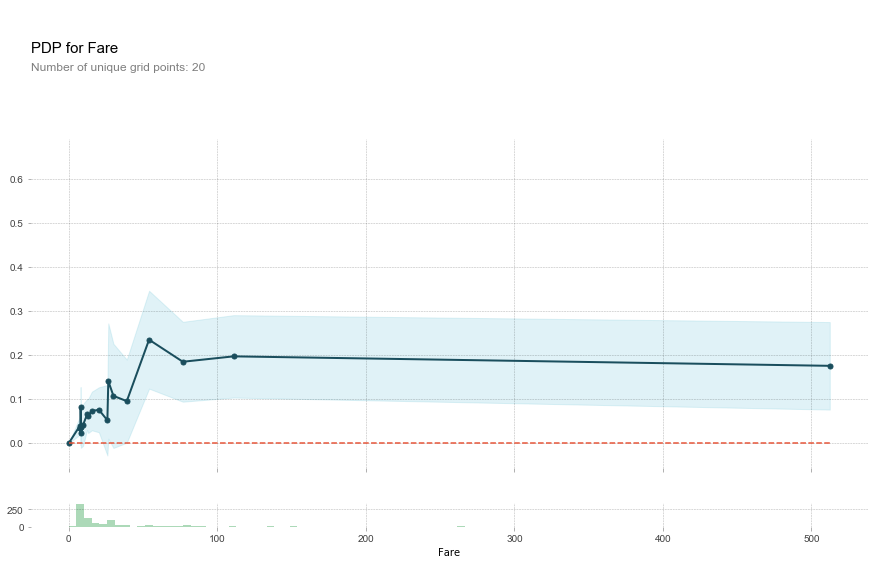

In [9]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5)

In [9]:
# try to choose a reasonable percentile range
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', num_grid_points=10, percentile_range=(5, 95))

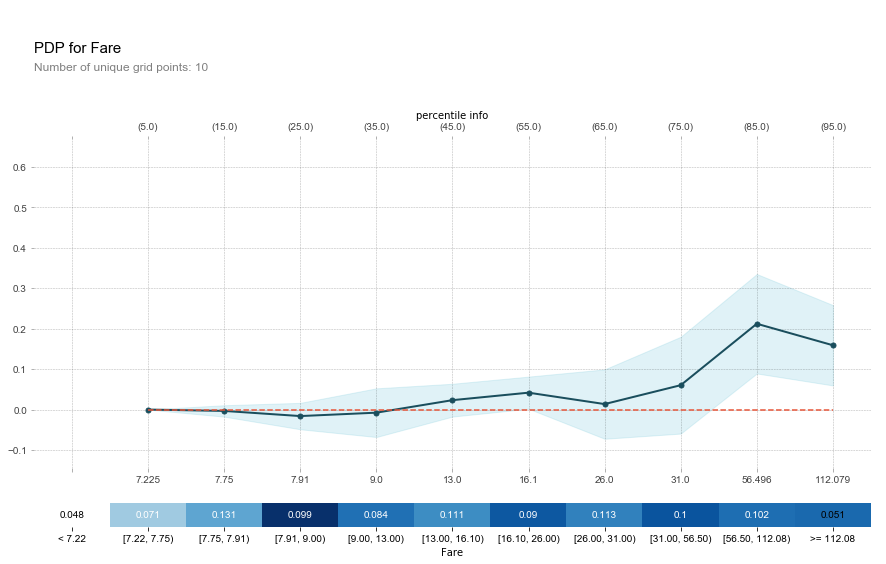

In [11]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=0.5, x_quantile=True, show_percentile=True)

In [ ]:
# try to set center=False
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5, center=False)

In [ ]:
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', grid_type='equal', grid_range=(0, 50))

In [ ]:
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', frac_to_plot=100, x_quantile=True)

In [ ]:
# try to customized the grid points
pdp_fare = pdp.pdp_isolate(titanic_model, titanic_data[titanic_features], 'Fare', cust_grid_points=range(0, 100, 5))
fig, axes = pdp.pdp_plot(pdp_fare, 'Fare', plot_lines=True, frac_to_plot=0.5)

## Test interaction between two variables
### interaction between two numeric variables Age and Fare

In [ ]:
inter1 = pdp.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

In [ ]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5)

#### it is better to set x_quantile=True

In [ ]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### you can also only plot out the contour plot by seting only_inter=True

In [ ]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], x_quantile=True, only_inter=True)